In [1]:
# Import some basic libraries

In [135]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Loading our dataset

In [136]:
df = pd.read_csv('census_income.csv')

In [137]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


So in our dataset we have total 32560 entries and 15 columns

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We donot have any null values

In [3]:
# Lets check value counts for all the columns

In [139]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64


Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64


Fnlwgt
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: count, Length: 21647, dtype: int64


Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool       

In [140]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [141]:
#transforming datatypes from object to numeric datatype by using OrdianlEncoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()

In [142]:
for i in df.columns:
    if df.dtypes[i] == 'object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [143]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0.0


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32560 non-null  int64  
 1   Workclass       32560 non-null  float64
 2   Fnlwgt          32560 non-null  int64  
 3   Education       32560 non-null  float64
 4   Education_num   32560 non-null  int64  
 5   Marital_status  32560 non-null  float64
 6   Occupation      32560 non-null  float64
 7   Relationship    32560 non-null  float64
 8   Race            32560 non-null  float64
 9   Sex             32560 non-null  float64
 10  Capital_gain    32560 non-null  int64  
 11  Capital_loss    32560 non-null  int64  
 12  Hours_per_week  32560 non-null  int64  
 13  Native_country  32560 non-null  float64
 14  Income          32560 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 3.7 MB


## Bivariate analysis

In [4]:
# Plotting scatter plot

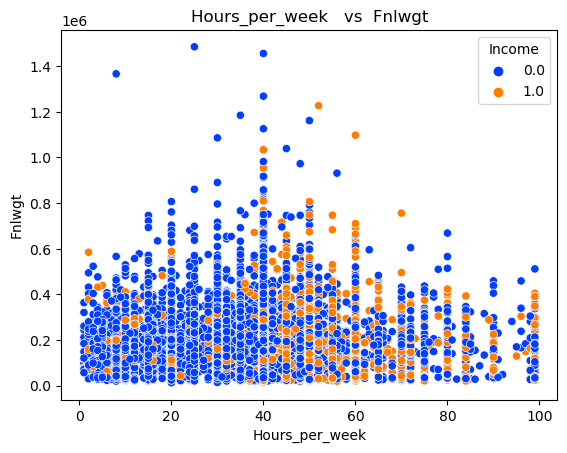

In [145]:
plt.title('Hours_per_week   vs  Fnlwgt')
sns.scatterplot(x='Hours_per_week',y='Fnlwgt',data= df ,hue='Income',palette= "bright" )
plt.show()

so at 40-60 hours per week income is grater than 50k

In [5]:
# Plotting scatterplot

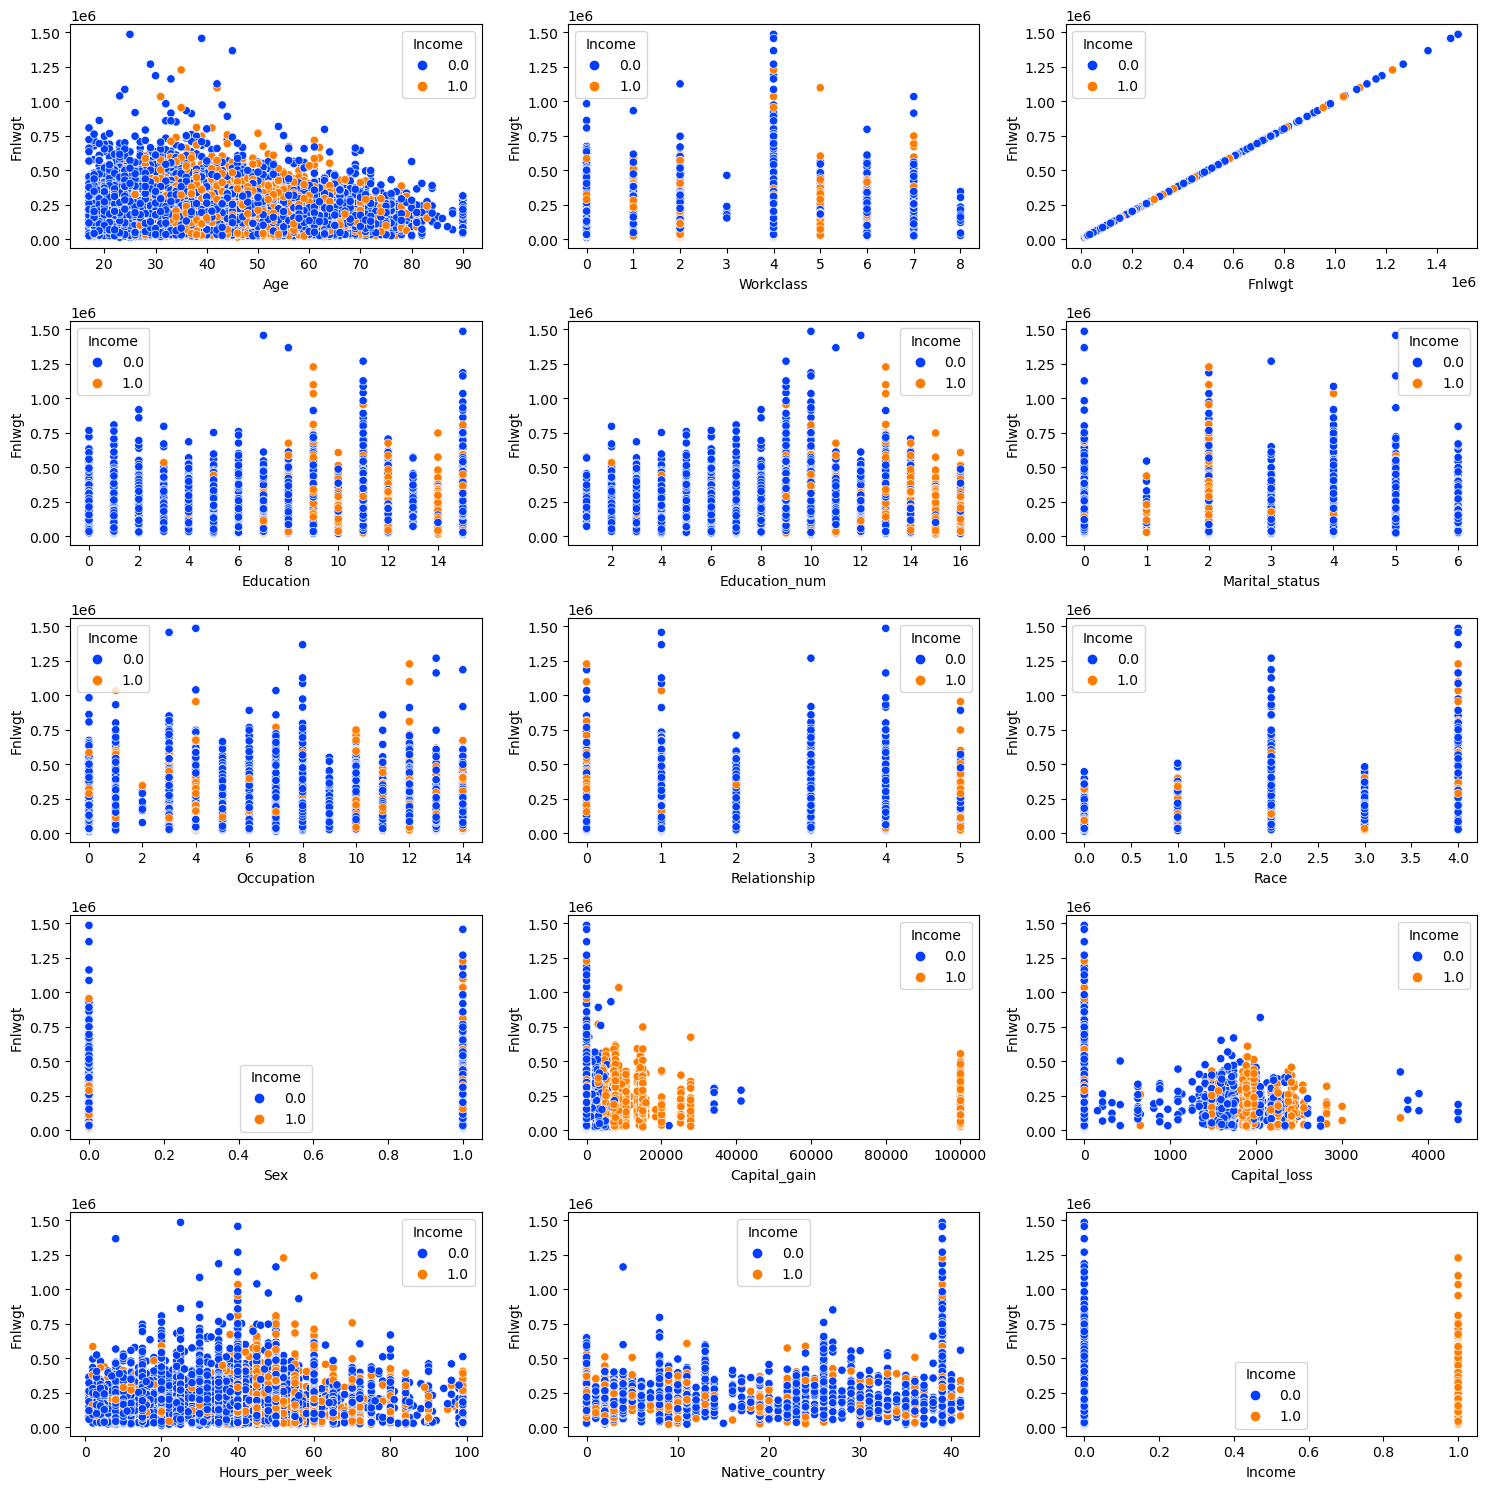

In [146]:
plt.figure(figsize=(15,15),facecolor='white')
plotnum=1
for i in df.columns:
    if plotnum<=15:
        ax=plt.subplot(5,3,plotnum)
        sns.scatterplot(x=i,y='Fnlwgt',data= df ,hue='Income',palette= "bright")
        plt.xlabel(i)
    plotnum+=1
plt.tight_layout()

At capital_gain range 20000 income is greater than 50k

At the age of 35 to 60 income is greater than 50k

In [147]:
df.Income.value_counts()

Income
0.0    24719
1.0     7841
Name: count, dtype: int64

so we have imbalanced target value

In [148]:
df.shape

(32560, 15)

In [149]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [150]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


by analysing the statistical summary we can see ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss', 'Native_country', 'Income'] these columns has skewness present because here mean is significantly different from median values

capital_gain,capital_loss,final_weight and native_country has some outliers are present because there are significant difference between 75th percentile and the max values

In [6]:
# Lets plot the dist plot to check the distribution of the columns

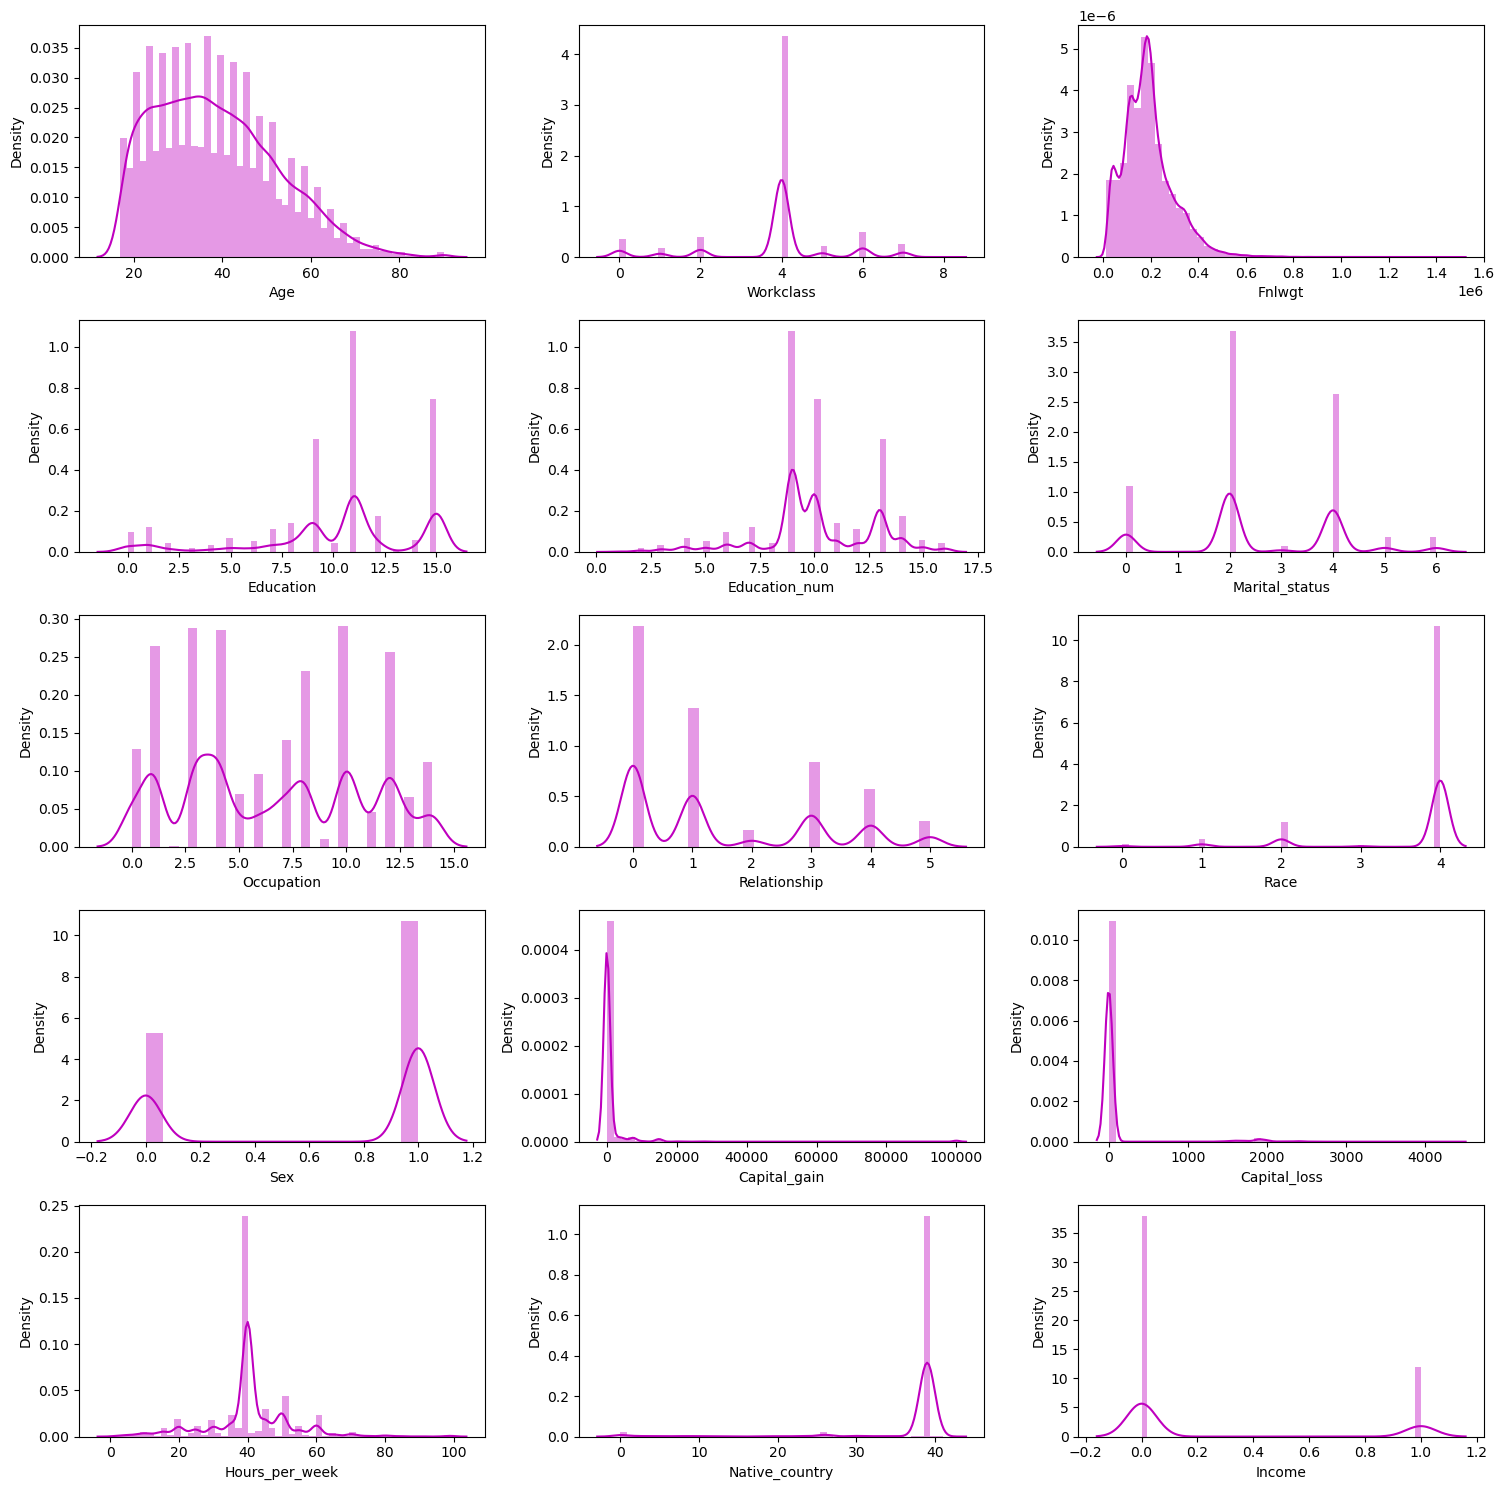

In [151]:
plt.figure(figsize=(15,15),facecolor='white')
plotnum=1
for i in df.columns:
    if plotnum<=15:
        ax=plt.subplot(5,3,plotnum)
        sns.distplot(df[i],color='m')
        plt.xlabel(i)
    plotnum+=1
plt.tight_layout()

So we can see that capital_loss,capital_gain,final_weight and native_country has skewness present 

In [152]:
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

So these columns 'Age', 'Workclass', 'Fnlwgt', 'Education', 'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss', 'Native_country', 'Income' has skewness present. before making our model we need to remove the skewness

In [153]:
skewed_col=[]
normal_col=[]
for i in df.columns:
    if (df[i].skew() >0.5) or (df[i].skew() <-0.5):
        skewed_col.append(i)
    else:
        normal_col.append(i)

print('skewed_col is :',skewed_col)
print('\n')
print("Normal_col is :",normal_col)

skewed_col is : ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss', 'Native_country', 'Income']


Normal_col is : ['Education_num', 'Marital_status', 'Occupation', 'Hours_per_week']


In [7]:
# Lets remove the skewness by using cuberoot technique

In [154]:
for i in skewed_col:
    df[i]=np.cbrt(df[i])

In [155]:
df.skew()

Age               0.090565
Workclass        -2.923788
Fnlwgt           -0.164177
Education        -2.817690
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Relationship     -0.102451
Race             -4.745983
Sex              -0.719244
Capital_gain      4.100150
Capital_loss      4.336999
Hours_per_week    0.227636
Native_country   -5.061925
Income            1.212383
dtype: float64

so skewness is somehow removed

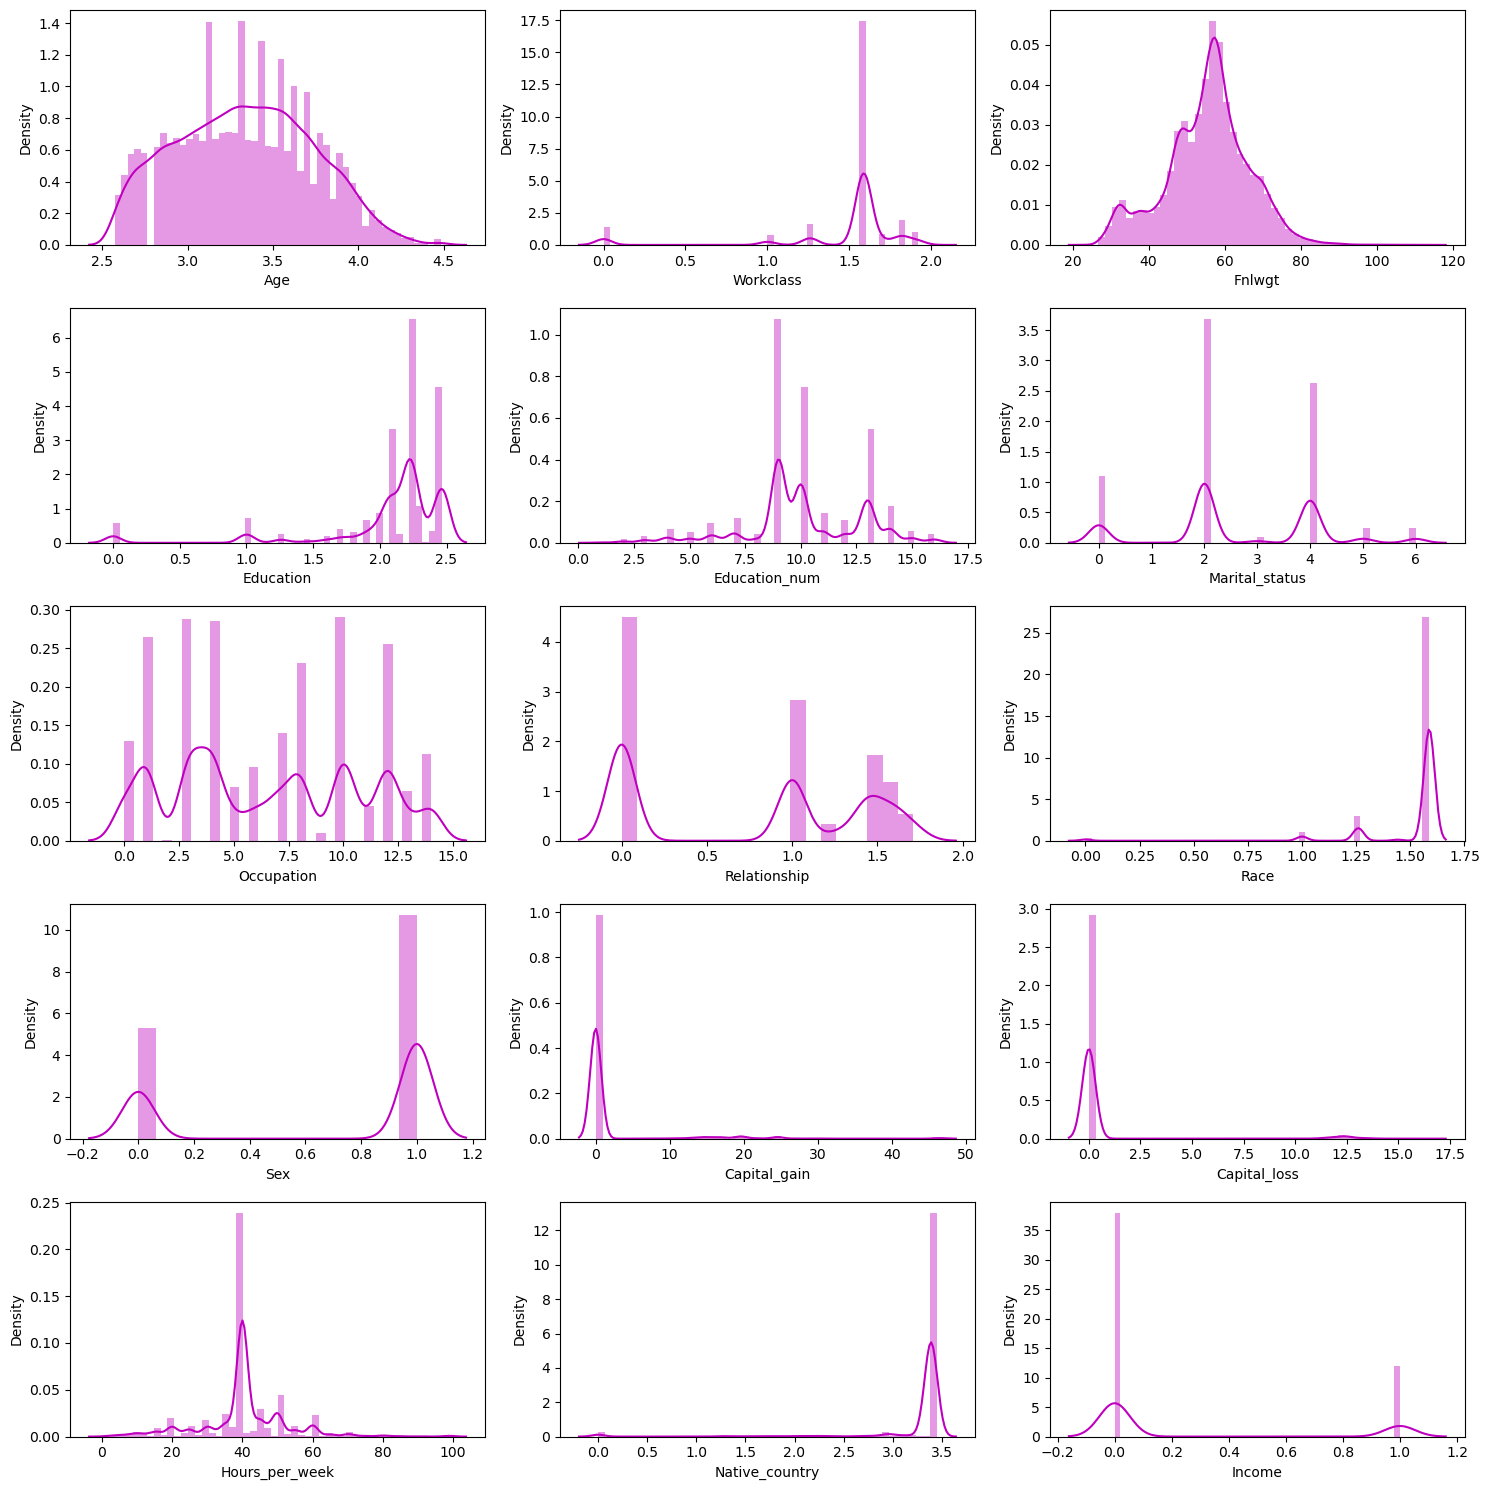

In [156]:
plt.figure(figsize=(15,15),facecolor='white')
plotnum=1
for i in df.columns:
    if plotnum<=15:
        ax=plt.subplot(5,3,plotnum)
        sns.distplot(df[i],color='m')
        plt.xlabel(i)
    plotnum+=1
plt.tight_layout()

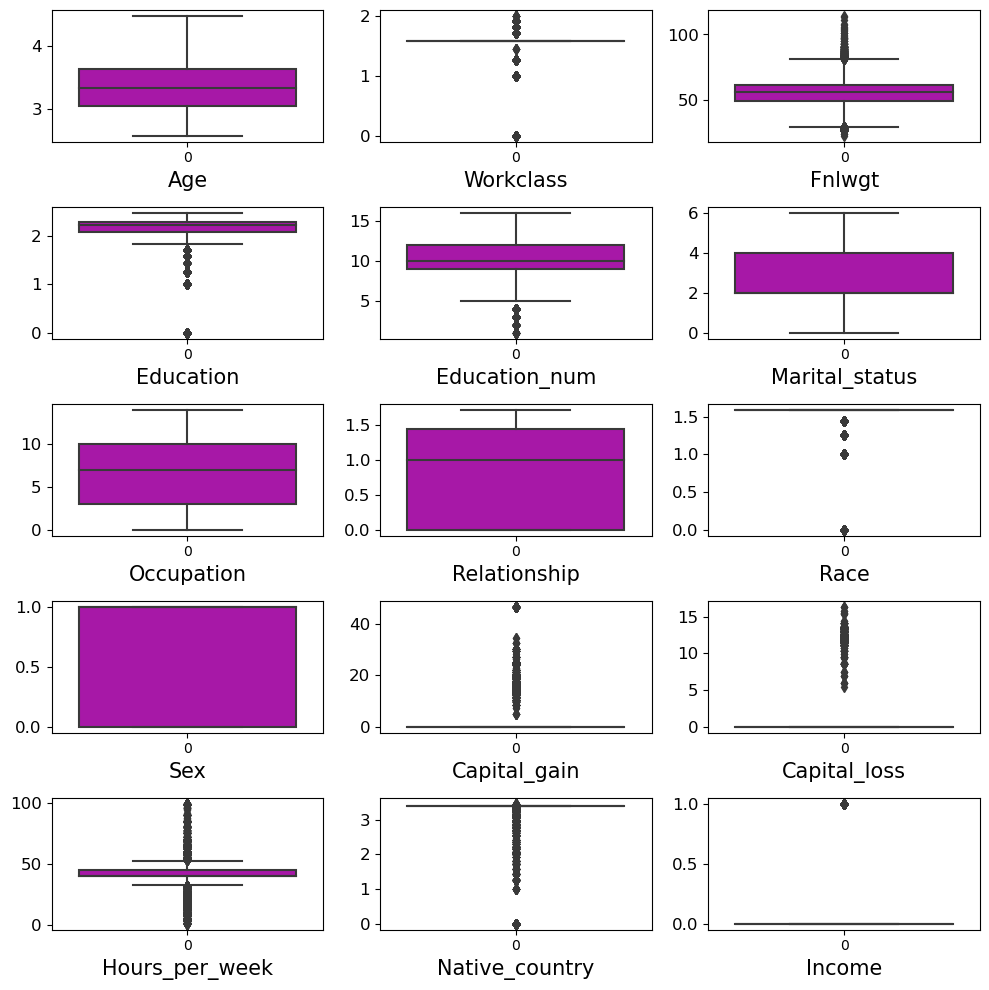

In [157]:
# Lets check the outliers by plotting the boxplot
plt.figure(figsize=(10,10),facecolor='white')
plotnumber =1
for col in df.columns:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(df[col],color = 'm')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation =0,fontsize=12)
    plotnumber += 1
plt.tight_layout()

capital_gain,capital_loss,final_weight and native_country has outliers present

In [158]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [159]:
a=['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country']

In [160]:
curr=df[a]

In [8]:
# Lets remove the outliers by using zscore method

In [161]:
from scipy.stats import zscore

In [162]:
z=np.abs(zscore(curr))

In [163]:
print(np.where(z>3))

(array([    7,     9,    13, ..., 32550, 32550, 32559], dtype=int64), array([10, 12, 13, ...,  3,  8, 10], dtype=int64))


In [164]:
df_new = df[(z<3).all(axis=1)]

In [165]:
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,3.684031,1.817121,43.675121,2.080084,13,2.0,4.0,0.000000,1.587401,1.0,0.0,0.0,13,3.391211,0.0
1,3.361975,1.587401,59.967204,2.223980,9,0.0,6.0,1.000000,1.587401,1.0,0.0,0.0,40,3.391211,0.0
2,3.756286,1.587401,61.685627,1.000000,7,2.0,6.0,0.000000,1.259921,1.0,0.0,0.0,40,3.391211,0.0
3,3.036589,1.587401,69.686283,2.080084,13,2.0,10.0,1.709976,1.259921,0.0,0.0,0.0,40,1.709976,0.0
4,3.332222,1.587401,65.776255,2.289428,14,2.0,4.0,1.709976,1.587401,0.0,0.0,0.0,40,3.391211,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,2.802039,1.587401,67.690054,2.466212,10,4.0,11.0,1.000000,1.587401,1.0,0.0,0.0,40,3.391211,0.0
32555,3.000000,1.587401,63.603506,1.912931,12,2.0,13.0,1.709976,1.587401,0.0,0.0,0.0,38,3.391211,0.0
32556,3.419952,1.587401,53.644440,2.223980,9,2.0,7.0,0.000000,1.587401,1.0,0.0,0.0,40,3.391211,1.0
32557,3.870877,1.587401,53.357498,2.223980,9,6.0,1.0,1.587401,1.587401,0.0,0.0,0.0,40,3.391211,0.0


so previously we have 32560 rows × 15 columns and after removing outliers we have now 25846 rows and 15 columns

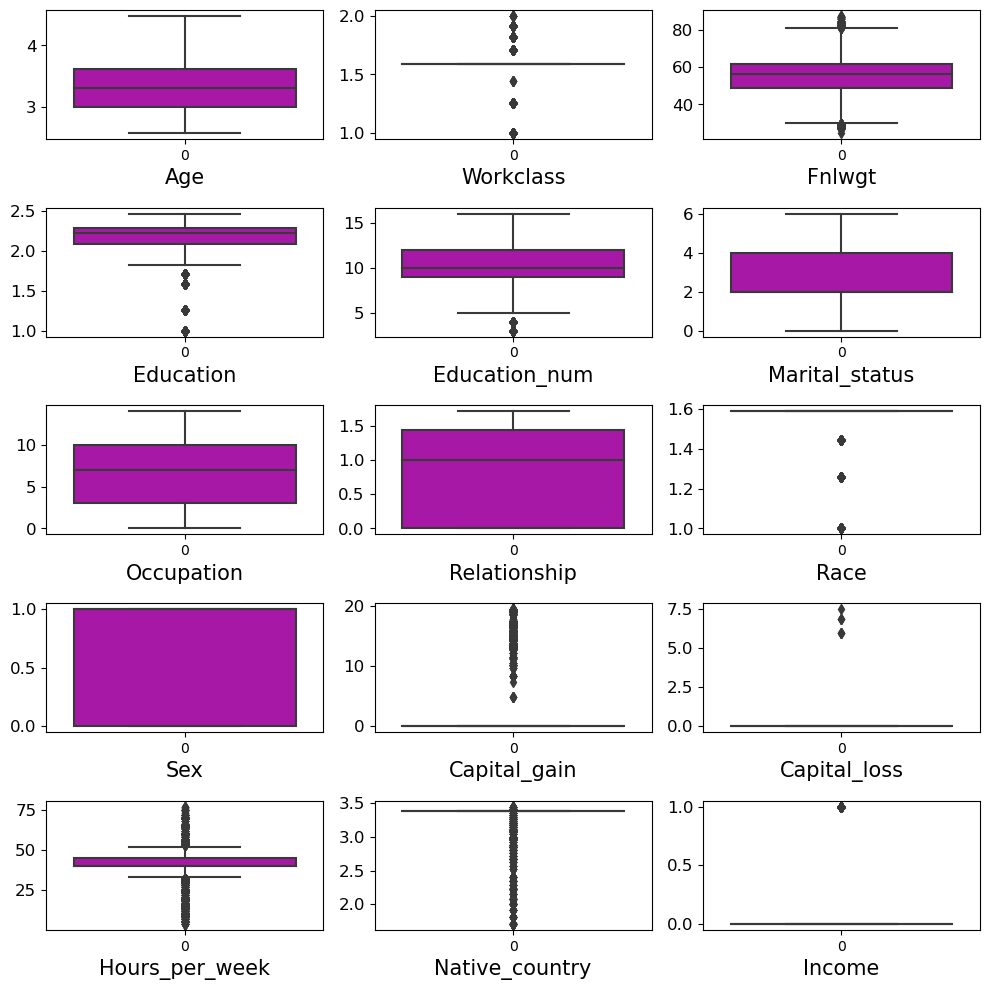

In [166]:
# Lets check the outliers by plotting the boxplot
plt.figure(figsize=(10,10),facecolor='white')
plotnumber =1
for col in df_new.columns:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(df_new[col],color = 'm')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation =0,fontsize=12)
    plotnumber += 1
plt.tight_layout()

In [167]:
df=df_new

In [9]:
# lets check the correlation

In [168]:
cor = df.corr()

In [169]:
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,-0.004541,-0.070237,0.042117,0.054484,-0.320966,-0.011010,-0.327679,0.017248,0.083043,0.074615,0.012098,0.145372,0.002242,0.246956
Workclass,-0.004541,1.000000,-0.020673,-0.008513,-0.034064,0.000230,0.020840,-0.046981,0.049754,0.059630,-0.010817,-0.004067,0.017749,-0.003512,-0.035857
Fnlwgt,-0.070237,-0.020673,1.000000,-0.020491,-0.041570,0.035602,-0.007565,0.024839,-0.046411,0.018815,-0.006613,-0.009432,-0.025279,-0.071762,-0.008270
Education,0.042117,-0.008513,-0.020491,1.000000,0.317263,-0.047342,-0.037051,-0.025577,0.002996,-0.019983,0.008606,0.004714,0.080536,0.070622,0.071770
Education_num,0.054484,-0.034064,-0.041570,0.317263,1.000000,-0.042761,0.089766,-0.074708,0.006393,-0.003927,0.026805,0.013183,0.139645,0.076888,0.288880
Marital_status,-0.320966,0.000230,0.035602,-0.047342,-0.042761,1.000000,0.023696,0.284860,-0.076868,-0.114665,-0.048171,-0.011496,-0.191473,-0.019646,-0.186743
Occupation,-0.011010,0.020840,-0.007565,-0.037051,0.089766,0.023696,1.000000,-0.049153,0.005997,0.070039,0.003149,0.006451,0.012545,-0.000152,0.045129
Relationship,-0.327679,-0.046981,0.024839,-0.025577,-0.074708,0.284860,-0.049153,1.000000,-0.114876,-0.610031,-0.084307,0.015320,-0.281525,-0.015289,-0.360348
Race,0.017248,0.049754,-0.046411,0.002996,0.006393,-0.076868,0.005997,-0.114876,1.000000,0.091195,0.019063,-0.007380,0.051270,0.100237,0.060337
Sex,0.083043,0.059630,0.018815,-0.019983,-0.003927,-0.114665,0.070039,-0.610031,0.091195,1.000000,0.049563,-0.019233,0.231993,0.007393,0.210909


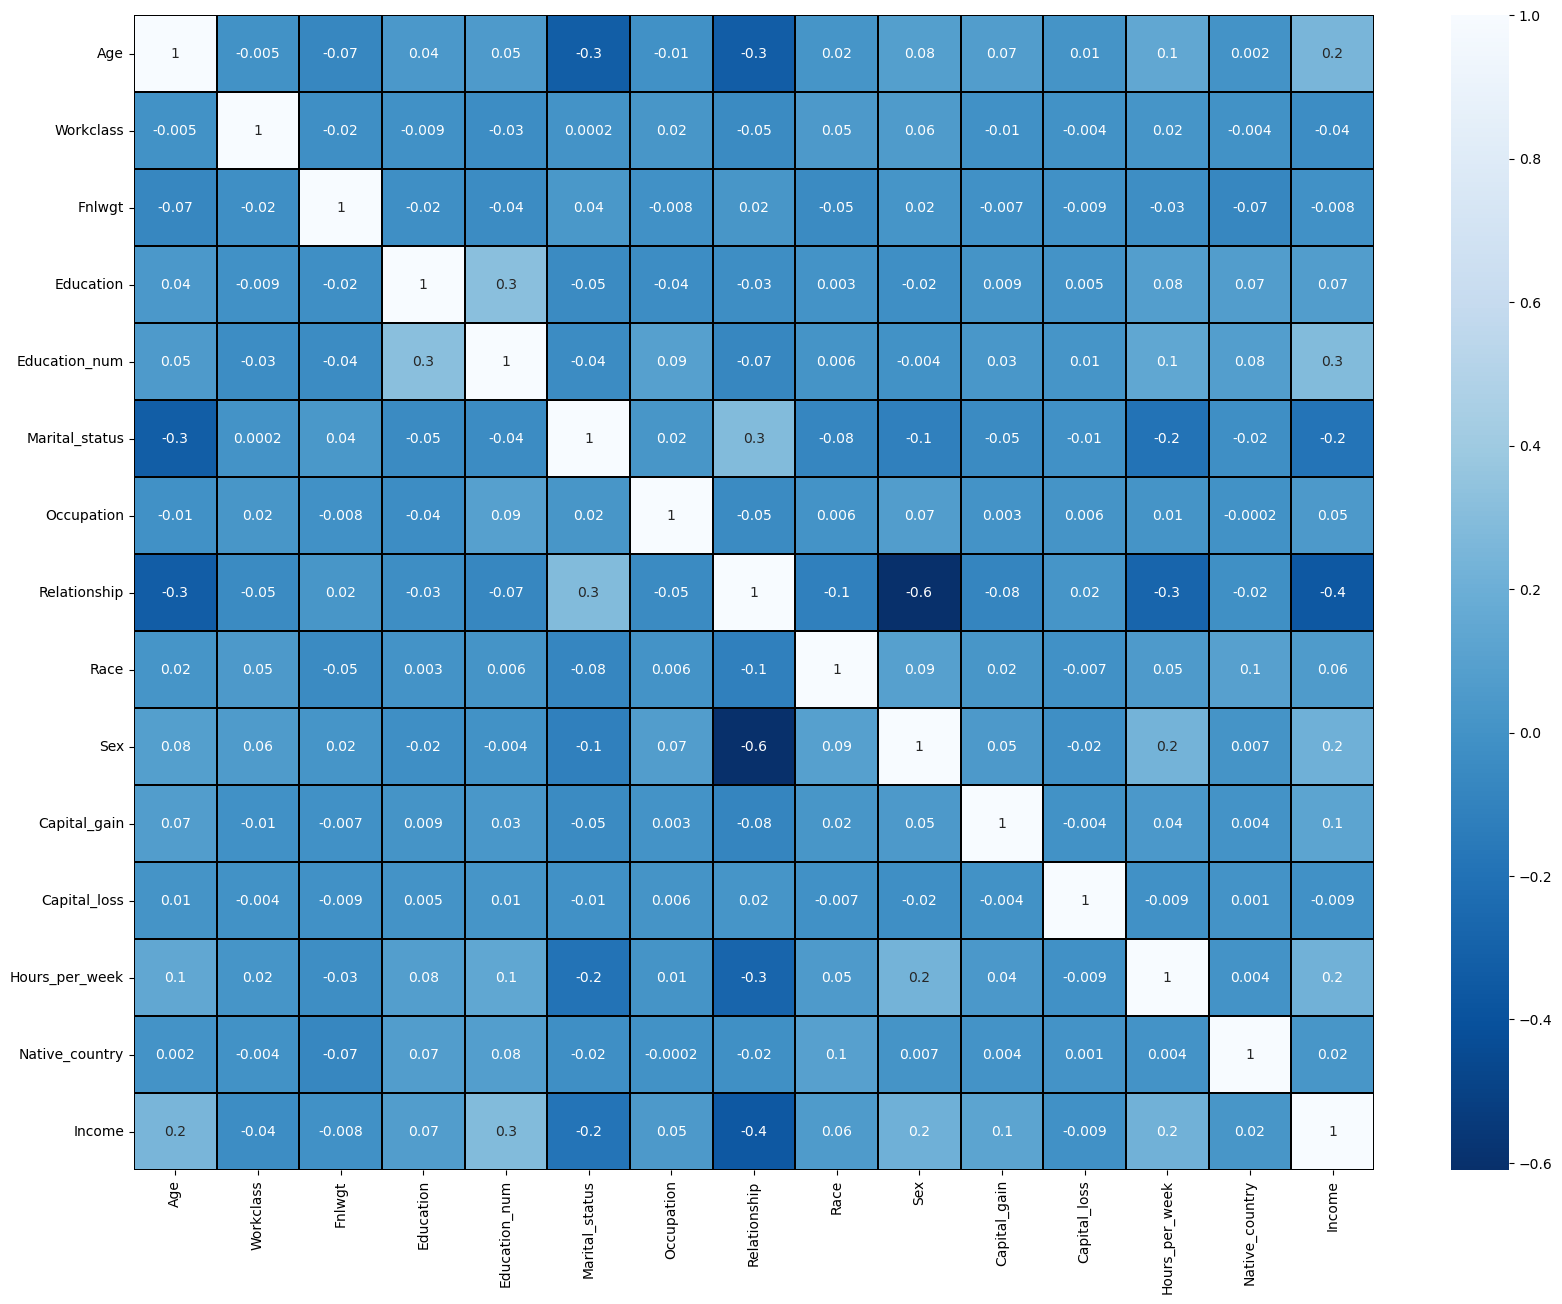

In [170]:
# visualization of correlation by heatmap 
plt.figure(figsize=(20,15))
sns.heatmap(cor,linewidths = .1,fmt='.1g',linecolor = 'black',annot = True,cmap = 'Blues_r')
plt.yticks(rotation =0)
plt.show()

In [171]:
cor['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.288880
Age               0.246956
Hours_per_week    0.219630
Sex               0.210909
Capital_gain      0.120823
Education         0.071770
Race              0.060337
Occupation        0.045129
Native_country    0.019054
Fnlwgt           -0.008270
Capital_loss     -0.009094
Workclass        -0.035857
Marital_status   -0.186743
Relationship     -0.360348
Name: Income, dtype: float64

Native_country,Fnlwgt,capital_loss,occupation,race and education columns has very less correlation with the Income column.

Education_num,age,hours_per_week,sex has significantly positive correlation and relationship has signifanctly negative correaltion with the target column

In [172]:
cor['Fnlwgt'].sort_values(ascending=False)

Fnlwgt            1.000000
Marital_status    0.035602
Relationship      0.024839
Sex               0.018815
Capital_gain     -0.006613
Occupation       -0.007565
Income           -0.008270
Capital_loss     -0.009432
Education        -0.020491
Workclass        -0.020673
Hours_per_week   -0.025279
Education_num    -0.041570
Race             -0.046411
Age              -0.070237
Native_country   -0.071762
Name: Fnlwgt, dtype: float64

So Fnlwgt column has very less correlation with all the columns 

In [10]:
# Separating x and y

In [173]:
x=df.drop('Income',axis=1)
y=df['Income']

In [174]:
x.shape

(25846, 14)

In [175]:
y.shape

(25846,)

In [11]:
# Lets check the vif factor for all the columns

In [176]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [177]:
ds=pd.DataFrame()
ds['col']=x.columns
ds['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
ds


,col,vif
0,Age,75.543669
1,Workclass,80.578069
2,Fnlwgt,26.249759
3,Education,50.968687
4,Education_num,22.793106
5,Marital_status,4.506867
6,Occupation,3.954010
7,Relationship,4.284555
8,Race,116.029986
9,Sex,4.873294


So native country has high vif values so we can drop this column

In [178]:
x.drop('Native_country',axis=1,inplace=True)

In [185]:
ds=pd.DataFrame()
ds['col']=x.columns
ds['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
ds

,col,vif
0,Age,1.230920
1,Workclass,1.008331
2,Fnlwgt,1.010366
3,Education,1.120861
4,Education_num,1.150776
5,Marital_status,1.184604
6,Occupation,1.019954
7,Relationship,1.928902
8,Race,1.021759
9,Sex,1.667984


now vif has stabled

In [179]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
st= StandardScaler()
x=pd.DataFrame(st.fit_transform(x),columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week
0,0.963596,1.414070,-1.106866,-0.245248,1.208546,-0.397663,-0.716157,-1.173464,0.368674,0.713436,-0.234504,-0.017532,-2.524832
1,0.121853,0.028818,0.428518,0.207312,-0.498227,-1.716370,-0.223869,0.333268,0.368674,0.713436,-0.234504,-0.017532,-0.023307
2,1.152444,0.028818,0.590464,-3.642157,-1.351614,-0.397663,-0.223869,-1.173464,-2.090259,0.713436,-0.234504,-0.017532,-0.023307
3,-0.728595,0.028818,1.344454,-0.245248,1.208546,-0.397663,0.760708,1.403011,-2.090259,-1.401667,-0.234504,-0.017532,-0.023307
4,0.044087,0.028818,0.975969,0.413150,1.635239,-0.397663,-0.716157,1.403011,0.368674,-1.401667,-0.234504,-0.017532,-0.023307
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25841,-1.341627,0.028818,1.156328,0.969142,-0.071534,0.921043,1.006852,0.333268,0.368674,0.713436,-0.234504,-0.017532,-0.023307
25842,-0.824226,0.028818,0.771207,-0.770950,0.781853,-0.397663,1.499141,1.403011,0.368674,-1.401667,-0.234504,-0.017532,-0.208606
25843,0.273383,0.028818,-0.167346,0.207312,-0.498227,-0.397663,0.022275,-1.173464,0.368674,0.713436,-0.234504,-0.017532,-0.023307
25844,1.451945,0.028818,-0.194388,0.207312,-0.498227,2.239750,-1.454590,1.218324,0.368674,-1.401667,-0.234504,-0.017532,-0.023307


In [180]:
df.Income.value_counts()

Income
0.0    20366
1.0     5480
Name: count, dtype: int64

In [181]:
#oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

In [182]:
y1.value_counts()

Income
0.0    20366
1.0    20366
Name: count, dtype: int64

In [12]:
# importing some metrices from sklearn

In [183]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [13]:
# checking for the best random_state vlaue

In [186]:
maxacc=0
maxrs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=i)
    RFC=RandomForestClassifier(n_jobs=-1)
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('best acc :',maxacc,  'random_state :',maxrs) 

best acc : 0.9051184485086535 random_state : 96


In [14]:
# spliting our dataset based on the best random_state value

In [187]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=maxrs)

In [15]:
# Lets make a copy of this 

In [188]:
x_train1,x_test1,y_train1,y_test1=x_train.copy(),x_test.copy(),y_train.copy(),y_test.copy()

In [189]:
from sklearn.model_selection import cross_val_score

In [16]:
# Importing SequentialFeatureSelector for feature selection purpose 

In [190]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [191]:
RFC = RandomForestClassifier()
sfs = SFS(RFC, k_features='best', forward=True, floating=False, scoring='accuracy',cv=5)

sfs.fit(x_train1, y_train1)

SequentialFeatureSelector(estimator=RandomForestClassifier(),
                          k_features=(1, 13), scoring='accuracy')

In [17]:
# Lets check the best index values of the columns given by the SequentialFeatureSelector

In [192]:
sfs.k_feature_idx_

(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)

In [18]:
# Lets check the column names 

In [193]:
selected_columns = sfs.k_feature_names_

print("Selected features:")
print(selected_columns)

Selected features:
('Age', 'Workclass', 'Fnlwgt', 'Education_num', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss', 'Hours_per_week')


In [19]:
# transforming our train and test datset based on the best columns and testing the cross_val_score 

In [194]:
x_train_2 = sfs.transform(x_train1)
x_test_2 = sfs.transform(x_test1)

model = RandomForestClassifier()

print("training",np.mean(cross_val_score(model, x_train_2, y_train, cv=5, scoring='accuracy')))
print("testing",np.mean(cross_val_score(model, x_test_2, y_test, cv=5, scoring='accuracy')))

training 0.8895810955961332
testing 0.8565119931306422


sequential Feature Selection method uses almost 12 columns and we get almost equal result. So it will always better to remove additional columns for the simplicity of the model

In [195]:
x_train_2

array([[ 0.57231381,  0.02881845,  0.2286762 , ..., -0.23450381,
        -0.01753194, -0.02330744],
       [ 0.71000827,  1.3805235 , -1.60161635, ..., -0.23450381,
        -0.01753194, -0.02330744],
       [ 1.50975804,  0.02881845,  0.0078716 , ..., -0.23450381,
        -0.01753194,  1.36642834],
       ...,
       [-0.82422616,  0.02881845,  0.54957559, ..., -0.23450381,
        -0.01753194, -0.02330744],
       [-0.54395742,  0.02881845,  2.08930938, ..., -0.23450381,
        -0.01753194,  0.43993782],
       [ 1.23648587, -1.94594753, -0.65213676, ..., -0.23450381,
        -0.01753194, -0.02330744]])

In [20]:
# making the dataframe

In [196]:
x_train_sfs = pd.DataFrame(x_train_2,columns=selected_columns)
x_test_sfs= pd.DataFrame(x_test_2,columns=selected_columns)

In [197]:
x_train_sfs

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week
0,0.572314,0.028818,0.228676,1.208546,0.921043,0.760708,0.333268,0.368674,0.713436,-0.234504,-0.017532,-0.023307
1,0.710008,1.380523,-1.601616,0.377314,-0.397663,-0.962301,-1.173464,0.368674,0.713436,-0.234504,-0.017532,-0.023307
2,1.509758,0.028818,0.007872,-0.498227,-0.397663,1.252997,-1.173464,0.368674,0.713436,-0.234504,-0.017532,1.366428
3,1.090305,1.991826,-1.314213,1.635239,-0.397663,0.760708,-1.173464,0.368674,0.713436,-0.234504,-0.017532,-0.023307
4,1.027365,0.028818,-1.664332,1.208546,-0.397663,-0.223869,-1.173464,0.368674,0.713436,-0.234504,-0.017532,-0.023307
...,...,...,...,...,...,...,...,...,...,...,...,...
32580,0.617786,0.028818,0.865759,0.383590,-0.397663,-0.502814,-1.173464,-4.041916,0.713436,3.814496,-0.017532,-0.188011
32581,-1.570640,-1.945948,1.146041,-0.071534,0.921043,1.006852,0.999619,-4.041916,-1.401667,-0.234504,-0.017532,-1.876288
32582,-0.824226,0.028818,0.549576,-0.498227,0.921043,-0.962301,0.999619,-2.090259,0.713436,-0.234504,-0.017532,-0.023307
32583,-0.543957,0.028818,2.089309,1.208546,0.921043,0.760708,0.333268,0.368674,0.713436,-0.234504,-0.017532,0.439938


In [21]:
# Importing some algotirhmns 

In [201]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [22]:
# making their instances

In [202]:
RFC=RandomForestClassifier(n_jobs=-1)
ET=ExtraTreesClassifier(n_jobs=-1)
LR=LogisticRegression(n_jobs=-1)
svc=SVC()
GBC=GradientBoostingClassifier()
ADC=AdaBoostClassifier()
BC=BaggingClassifier(n_jobs=-1)
DTC=DecisionTreeClassifier()
KNN=KNeighborsClassifier(n_jobs=-1)
MNB=MultinomialNB()
GNB=GaussianNB()

In [203]:
loop = [RFC,ET,LR,svc,GBC,ADC,BC,DTC,KNN,GNB]

In [204]:
from sklearn.metrics import roc_auc_score

In [23]:
# Runnig a loop for all selected algorithmns and comparing their cross_val_score with their accuracies

In [206]:
for i in loop:
    i.fit(x_train_sfs,y_train)
    pred=i.predict(x_test_sfs)
    print('This is for :',i)
    print('roc_auc_score will be :',roc_auc_score(y_test,pred))
    print('confusion matrix will be :','\n')
    print(confusion_matrix(y_test,pred))
    print('classification report will be :','\n')
    print(classification_report(y_test,pred))
    
    score= cross_val_score(i,x_train_sfs,y_train,cv=5,scoring='roc_auc')
    print('Cross val score will be :',score)
    print('Mean cv :',score.mean())
    print('Difference between cv and roc_auc_score will be :',roc_auc_score(y_test,pred)-score.mean())
    print('\n')
    

This is for : RandomForestClassifier(n_jobs=-1)
roc_auc_score will be : 0.906807083367185
confusion matrix will be : 

[[3593  443]
 [ 315 3796]]
classification report will be : 

              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90      4036
         1.0       0.90      0.92      0.91      4111

    accuracy                           0.91      8147
   macro avg       0.91      0.91      0.91      8147
weighted avg       0.91      0.91      0.91      8147

Cross val score will be : [0.95999728 0.95539952 0.9588954  0.9595163  0.95722702]
Mean cv : 0.9582071030761086
Difference between cv and roc_auc_score will be : -0.051400019708923605


This is for : ExtraTreesClassifier(n_jobs=-1)
roc_auc_score will be : 0.9081671367326751
confusion matrix will be : 

[[3549  487]
 [ 259 3852]]
classification report will be : 

              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90      4036
         1.0       

So ExtratreesClassifier has the best performance.

because The ROC AUC score is 0.9082, which is a good score as it’s close to 1.
The confusion matrix shows that the model made 3549 True Negative predictions and 3852 True Positive predictions. However, there were 487 False Positives and 259 False Negatives

The cross-validation scores are quite high, indicating that the model performs well on different subsets of the dataset. The mean cross-validation score is 0.9605, which is higher than the ROC AUC score.
The difference between the mean cross-validation score and the ROC AUC score is -0.0523. 

In [24]:
# Importing Grid search CV for Hyper parameter tuning

In [211]:
from sklearn.model_selection import GridSearchCV

In [25]:
# selecting all the parameters to check which parameters is the best

In [212]:
parameters = {'n_estimators':[100,150,200],'criterion':['gini','entropy','log_loss'],'n_jobs':[-1],'max_leaf_nodes':[2,4,5,None],'max_depth':[2,3,4,5,None]}

In [213]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameters,cv=5,n_jobs=-1)

In [26]:
# fitting GCV

In [214]:
GCV.fit(x_train_sfs,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, None],
                         'max_leaf_nodes': [2, 4, 5, None],
                         'n_estimators': [100, 150, 200], 'n_jobs': [-1]})

In [215]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_leaf_nodes': None,
 'n_estimators': 200,
 'n_jobs': -1}

so these are the best parameters

In [27]:
# Creating our final model based on the best parameters

In [224]:
final_model = ExtraTreesClassifier(criterion = "gini",max_depth=None,max_leaf_nodes=None,n_estimators=200,n_jobs=-1)
final_model.fit(x_train_sfs,y_train)
pred=final_model.predict(x_test_sfs)
acc=accuracy_score(y_test,pred)
print(acc*100)

91.27286117589297


So 91.27 is our accuracy_score for our final_model

In [225]:
# Lets save our model
import joblib
filename = 'census_income.pkl'
joblib.dump(final_model, filename)
model = joblib.load(filename)

In [28]:
# Lets plot the ROC curve

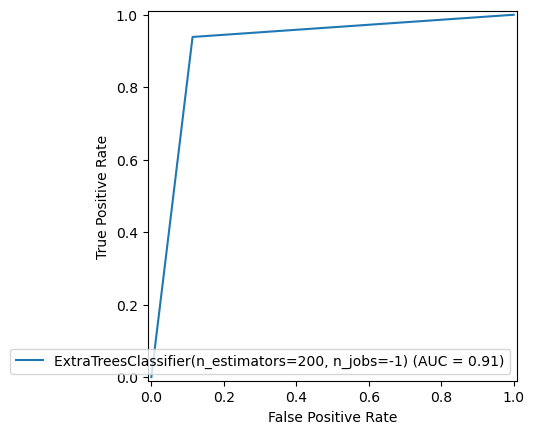

In [226]:
from sklearn import metrics
fpr,tpr,thresolds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

In [29]:
# roc_auc_score

In [227]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,pred)
auc_score

0.9124872920654031

the roc auc score is 91.248%

In [228]:
# Lets test our model

In [229]:
t=np.array([0.572314,	0.028818,	0.228676,	1.208546,	0.921043,	0.760708,	0.333268,	0.368674,	0.713436,	-0.234504,	-0.017532,	-0.023307]).reshape(1,-1)
final_model.predict(t)    #1

array([1.])

In [230]:
t=np.array([1.509758,	0.028818,	0.007872,	-0.498227,	-0.397663,	1.252997,	-1.173464,	0.368674,	0.713436,	-0.234504,	-0.017532,	1.366428]).reshape(1,-1)
final_model.predict(t)     #0

array([0.])

In [221]:
x_train_sfs

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week
0,0.572314,0.028818,0.228676,1.208546,0.921043,0.760708,0.333268,0.368674,0.713436,-0.234504,-0.017532,-0.023307
1,0.710008,1.380523,-1.601616,0.377314,-0.397663,-0.962301,-1.173464,0.368674,0.713436,-0.234504,-0.017532,-0.023307
2,1.509758,0.028818,0.007872,-0.498227,-0.397663,1.252997,-1.173464,0.368674,0.713436,-0.234504,-0.017532,1.366428
3,1.090305,1.991826,-1.314213,1.635239,-0.397663,0.760708,-1.173464,0.368674,0.713436,-0.234504,-0.017532,-0.023307
4,1.027365,0.028818,-1.664332,1.208546,-0.397663,-0.223869,-1.173464,0.368674,0.713436,-0.234504,-0.017532,-0.023307
...,...,...,...,...,...,...,...,...,...,...,...,...
32580,0.617786,0.028818,0.865759,0.383590,-0.397663,-0.502814,-1.173464,-4.041916,0.713436,3.814496,-0.017532,-0.188011
32581,-1.570640,-1.945948,1.146041,-0.071534,0.921043,1.006852,0.999619,-4.041916,-1.401667,-0.234504,-0.017532,-1.876288
32582,-0.824226,0.028818,0.549576,-0.498227,0.921043,-0.962301,0.999619,-2.090259,0.713436,-0.234504,-0.017532,-0.023307
32583,-0.543957,0.028818,2.089309,1.208546,0.921043,0.760708,0.333268,0.368674,0.713436,-0.234504,-0.017532,0.439938


In [222]:
y_train

40597    1.0
33133    1.0
23260    0.0
2063     0.0
13487    0.0
        ... 
34882    1.0
22132    0.0
2412     0.0
9638     0.0
29658    1.0
Name: Income, Length: 32585, dtype: float64